In [15]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

In [16]:
df=pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [19]:
X=df.iloc[:,:4]
y=df.iloc[:,4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [20]:
clf=DecisionTreeClassifier(criterion='entropy', splitter='best', max_leaf_nodes=3)
clf.fit(X_train,y_train.values.ravel())
y_pred=clf.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [22]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

In [23]:
fn=['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm',	'PetalWidthCm']#column names of the dataset
cn=['Iris-setosa','	Iris-versicolor','Iris-virginica']#names of classes to be classified

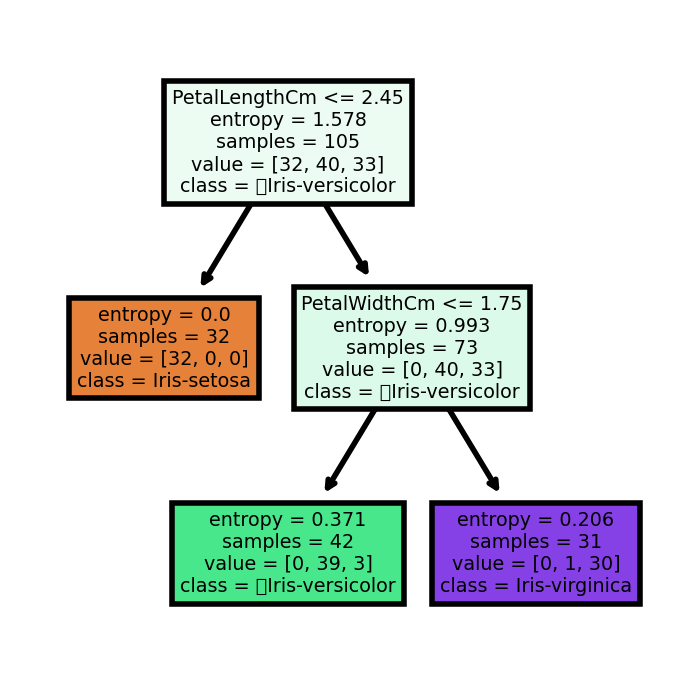

In [24]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=400)
tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [25]:
species_check = clf.predict([[4.7,	3.2,	1.3,	0.2]])[0]
species_check

0